# **SW08: Ensemble learning**

Ensemble learning is a technique in machine learning where multiple models, called "learners" or "base models," are combined to solve the same problem. Instead of relying on just one model, ensemble learning takes advantage of the strengths of multiple models to improve accuracy and robustness. There are several types of ensemble methods, such as bagging (e.g., random forests), where models are trained independently and their results are averaged, and boosting, where models are trained sequentially to correct previous errors. By combining models, ensemble learning can produce a final prediction that is generally more accurate and less prone to errors than any single model.

scikit-learn offers several means to create own ensembles of classifiers, which 
we will explore in this tutorial.

---

## **Setup**

In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.datasets import load_iris

# Some Jupyter magic for nicer output
%config InlineBackend.figure_formats = ["svg"]   # Enable vectorized graphics

# Adjust the default settings for plots
import sys
sys.path.append("..")
import ml
ml.setup_plotting()

This time, we will use the [digits dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html).
The dataset contains 8x8 grayscale pixel images of handwritten digits, flattened to 64 pixels.


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

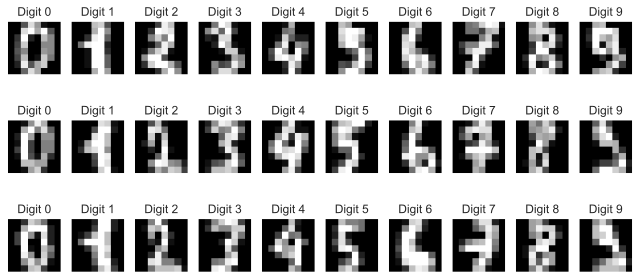

In [3]:

from sklearn.datasets import load_digits
data = load_digits(as_frame=True) 
X, y = data.data, data.target

display(X)

# Let's visualize some of the images
fig, axes = plt.subplots(3, 10, figsize=(9, 4.5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(8, 8), cmap="gray")
    ax.set_title(f"Digit {y[i]}")
    ax.axis("off")
fig.tight_layout()

# To learn more about the dataset...
print(data.DESCR)

---

## **Majority voting**

Let's build our own ensemble of learners using scikit-learn's 
[VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

The VotingClassifier is a meta-estimator that fits multiple base learners on 
the same dataset and combines their predictions using a voting strategy.
Two voting strategies are available: hard voting and soft voting.
- *Hard voting*: Equivalent to majority voting; the predicted class label is 
the majority class label predicted by all the classifiers.
- *Soft voting*: Takes the average of the predicted probabilities for each
class across all models. The final prediction is then the class with the 
highest average probability.

Note that ties lead to a bias in the result, so avoid them if possible.
For binary classification, it is advisable to choose an odd number of 
classifiers when doing hard voting.

In [4]:
# Some relevant imports
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
clf_LR = LogisticRegression() 
clf_kNN = KNeighborsClassifier() 
clf_DT = DecisionTreeClassifier(random_state=42)

# We specify the classifiers as a list of tuples, where each tuple contains a
# name for the classifier and the classifier itself.
estimators=[('LR', clf_LR), ('kNN', clf_kNN), ('DT', clf_DT)]

clf_voting = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# Split the dataset into training set and test set
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.9) 

In [6]:
# As we have seen in other notebooks, it is often helpful to standardize the 
# data before training. (Especially for kNN and LR are sensitive to the scale
# of the features.)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Let's train and predict the voting ensemble:
clf_voting.fit(X_train, y_train)
y_pred = clf_voting.predict(X_test)

# Compute the prediction performance. How often is the classifier correct?
print("Accuracy Vote: %.3f" % accuracy_score(y_test , y_pred))

# How do the single estimators perform?
for clf_name, clf in estimators:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy %4s: %.3f" % (clf_name,accuracy_score(y_test , y_pred)))
    

Accuracy Vote: 0.901
Accuracy   LR: 0.922
Accuracy  kNN: 0.912
Accuracy   DT: 0.659


c:\Daten\ADLS\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Daten\ADLS\ML\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [8]:
# Let's compare the classifier's performance with hard and soft voting.
for setting in ['soft','hard']: 
    voting_clf = VotingClassifier(
        estimators=estimators,
        voting=setting
    )

    voting_clf.fit(X_train,y_train)
    y_pred = voting_clf.predict(X_test)
    acc = accuracy_score(y_test , y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Accuracy Vote (%s): %.3f" % (setting, acc))

Accuracy Vote (soft): 0.901
Accuracy Vote (hard): 0.918


---

## **Bagging classifier**

A bagging classifier is an ensemble method that trains multiple instances of the same base model on different random subsets of the training data, created through bootstrapping (sampling with replacement). Each model independently predicts the target, and the final prediction is made by aggregating the results, typically through majority voting (for classification) or averaging (for regression). This approach helps reduce overfitting and variance, making the overall model more stable and accurate compared to using a single model.

The corresponing scikit-learn object is the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

For this method, we will use one single base classifier. Here we employ a
$k$-nearest neighbors classifier.

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(),
                            random_state=42,  # For reproducibility
                            max_samples=0.5,  # Use 50% of the samples per estimator
                            max_features=0.3) # Use 30% of the features per estimator

bagging.fit(X_train,y_train)
y_pred = bagging.predict(X_test)
print("Accuracy Bagging: %.3f" % accuracy_score(y_test , y_pred))

Accuracy Bagging: 0.897


---

## **Boosting**

Boosting is an ensemble learning technique that combines multiple weak learners (typically simple models, like shallow decision trees) sequentially to create a strong predictive model. In boosting, each model is trained to correct the errors of the previous ones by giving more weight to misclassified instances, so the ensemble focuses on difficult cases over time. Popular boosting algorithms, such as AdaBoost and Gradient Boosting, iteratively improve accuracy, resulting in a model that is both more accurate and resilient to errors compared to any individual learner in the sequence.



In [10]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier)

clf_ada = AdaBoostClassifier(n_estimators=200, algorithm="SAMME", 
                             random_state=42)
clf_boost = GradientBoostingClassifier(n_estimators=300,   # Use 100 estimators
                                       max_depth=3,       # Limit the depth of the trees
                                       random_state=42)   # Use 100 estimators

for key, clf in dict(Ada=clf_ada, Boost=clf_boost).items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy %-5s: %.3f" % (key, accuracy_score(y_test , y_pred)))


Accuracy Ada  : 0.746
Accuracy Boost: 0.847
